In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook')
import scipy
import matplotlib.patches as mpatches

In [2]:
distances = np.load('distances2_cisphospho.npy')
dist2 = np.concatenate([x[0] for x in distances])
del distances

In [3]:
distances = np.load('distances3_cisphospho.npy')
dist3 = np.concatenate([x[0] for x in distances])
del distances

In [4]:
distances = np.load('distances4_cisphospho.npy')
dist4 = np.concatenate([x[0] for x in distances])
del distances

In [5]:
distances = np.load('distances5_cisphospho.npy')
dist5 = np.concatenate([x[0] for x in distances])
del distances

In [6]:
# KS test to see which ones are different, then plot those

In [8]:
stats3 = []

for dist in range(dist3.shape[1]):
    stats3.append(scipy.stats.ks_2samp(dist2[:,dist], dist3[:,dist])[0])
    
stats3 = np.array(stats3)    

In [9]:
len(np.concatenate(np.argwhere(stats3 >= 0.1)))

39

In [10]:
stats4 = []

for dist in range(dist2.shape[1]):
    stats4.append(scipy.stats.ks_2samp(dist2[:,dist], dist4[:,dist])[0])
    
stats4 = np.array(stats4)    

In [16]:
len(np.concatenate(np.argwhere(stats4 >= 0.1)))

36

In [14]:
stats5 = []

for dist in range(dist2.shape[1]):
    stats5.append(scipy.stats.ks_2samp(dist2[:,dist], dist5[:,dist])[0])
    
stats5 = np.array(stats5)    

In [17]:
len(np.concatenate(np.argwhere(stats5 >= 0.1)))

37

In [21]:
common = []

for x in set(np.concatenate(np.argwhere(stats3 >= 0.1))):
    if x in set(np.concatenate(np.argwhere(stats4 >= 0.1))) and x in set(np.concatenate(np.argwhere(stats5 >= 0.1))):
        common.append(x)

In [22]:
len(common)

23

In [23]:
############## plotting ###########

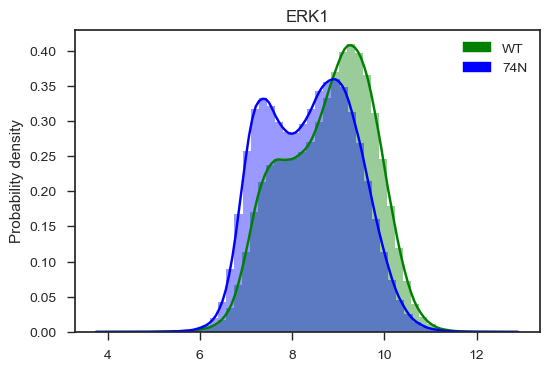

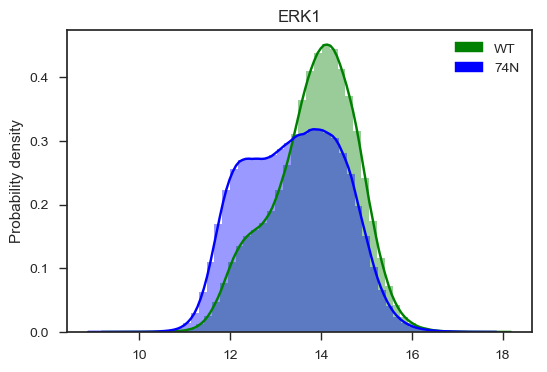

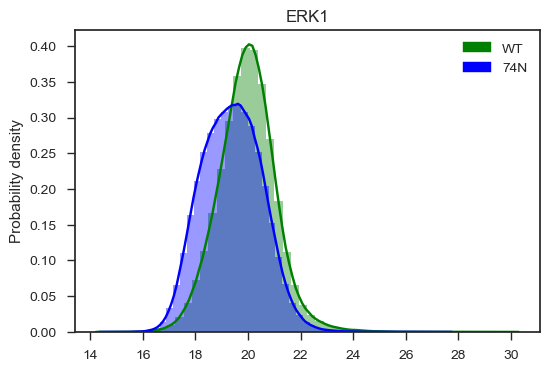

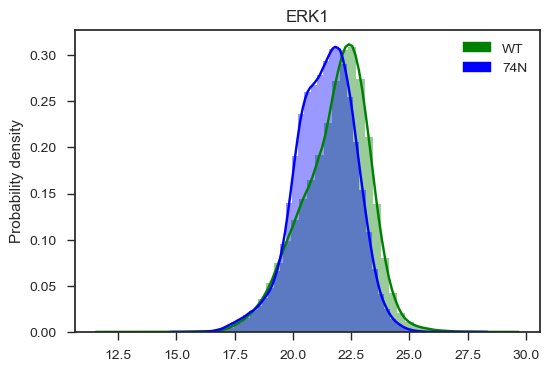

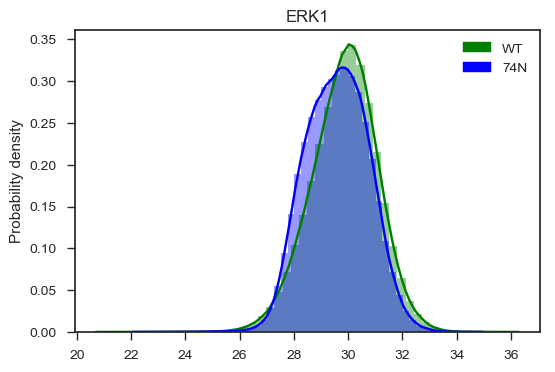

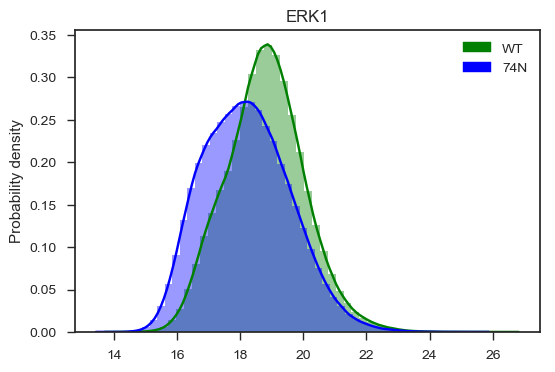

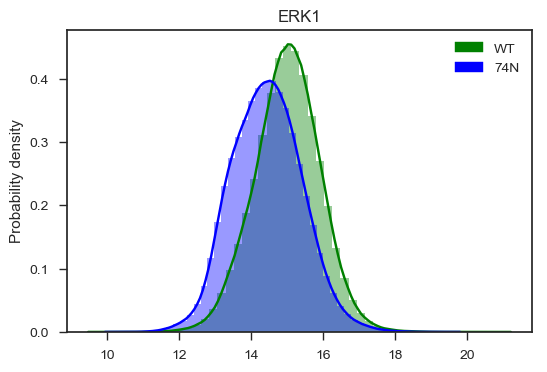

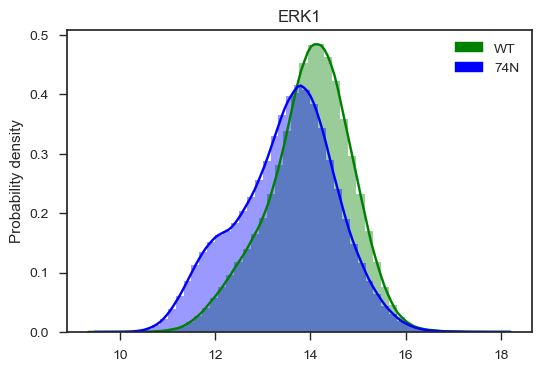

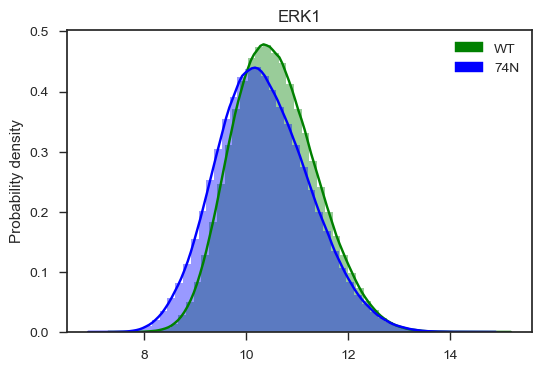

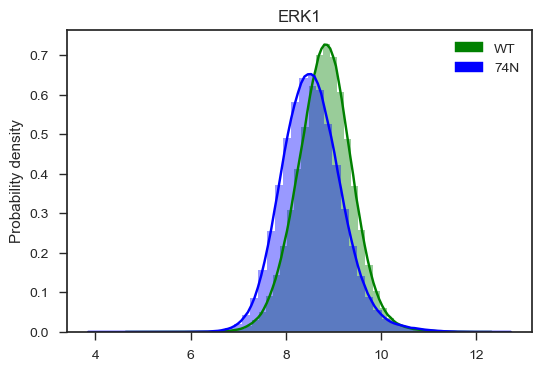

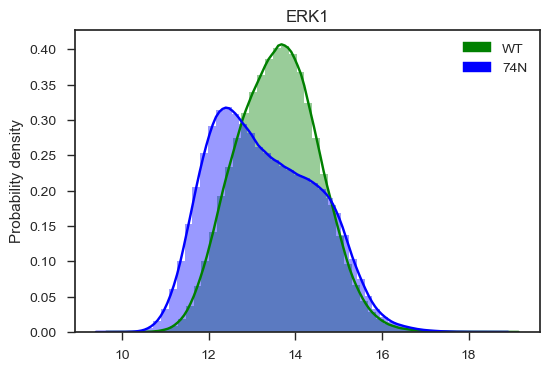

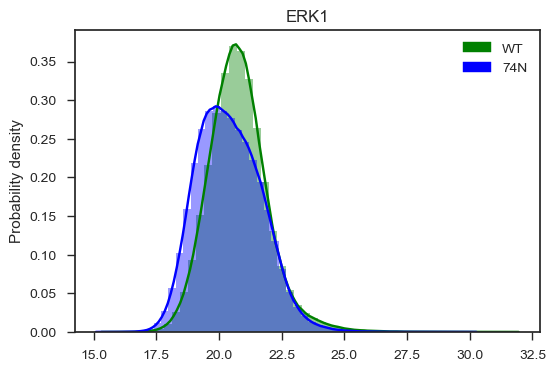

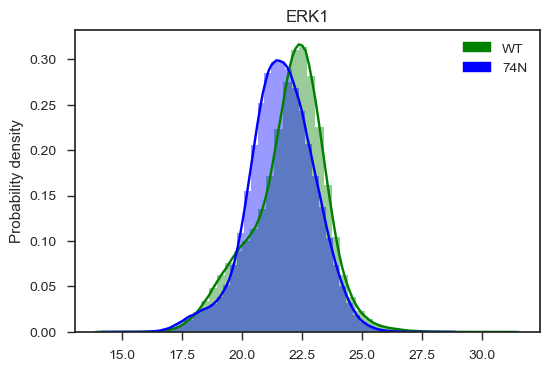

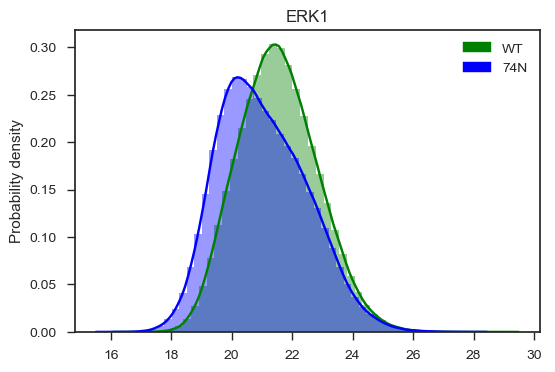

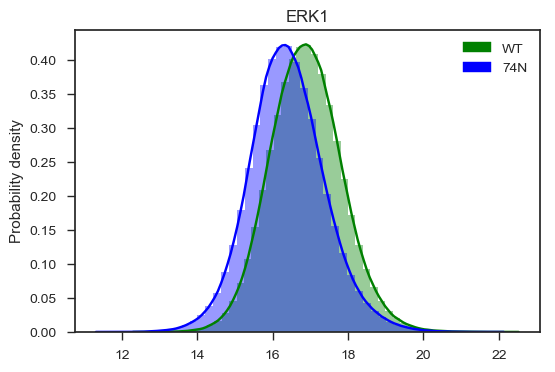

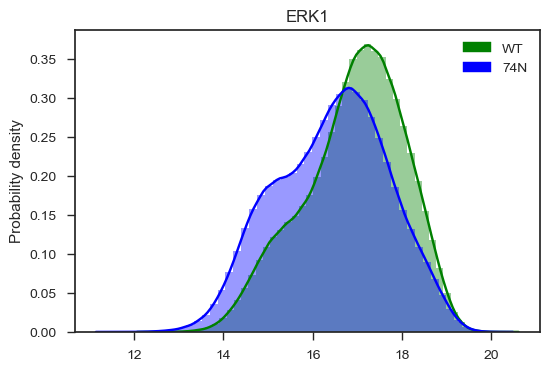

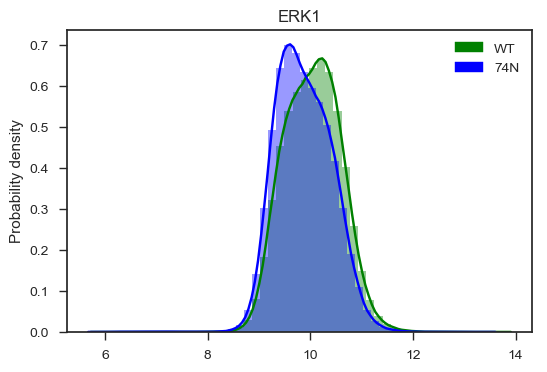

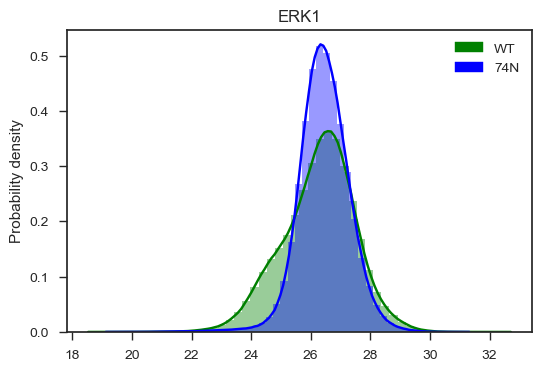

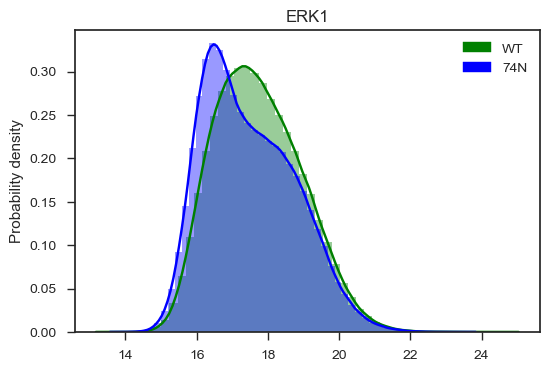

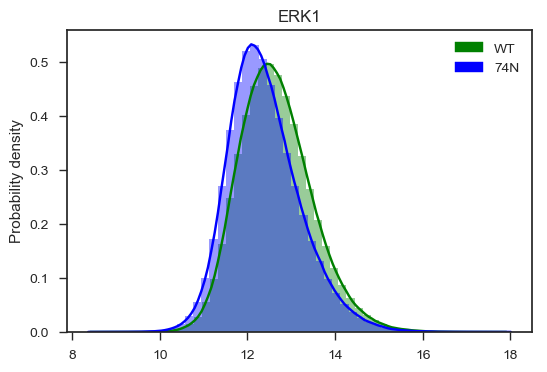

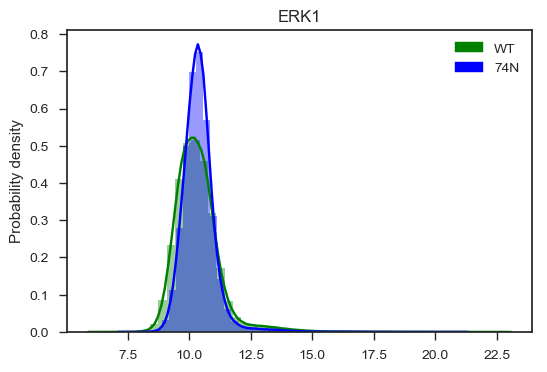

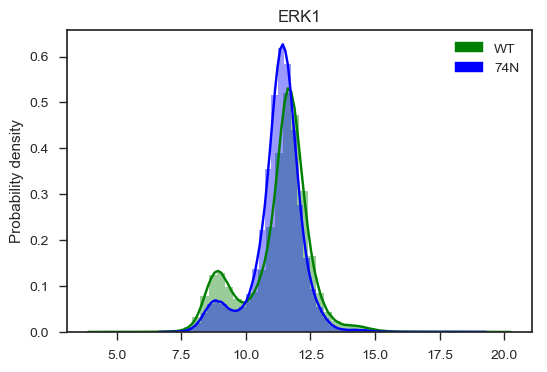

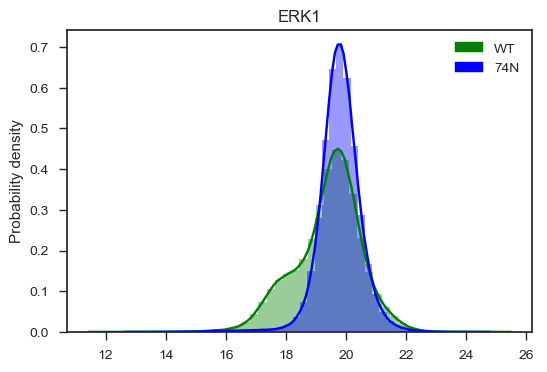

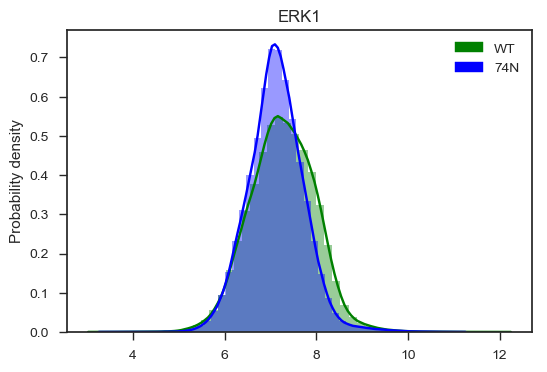

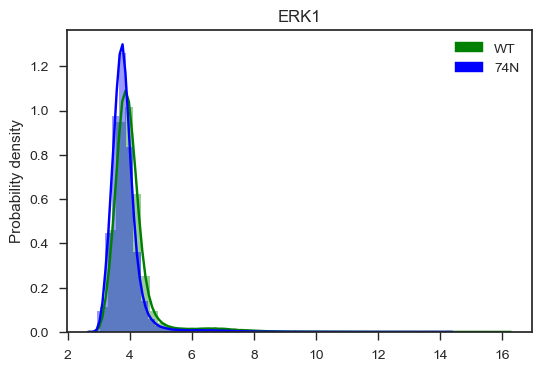

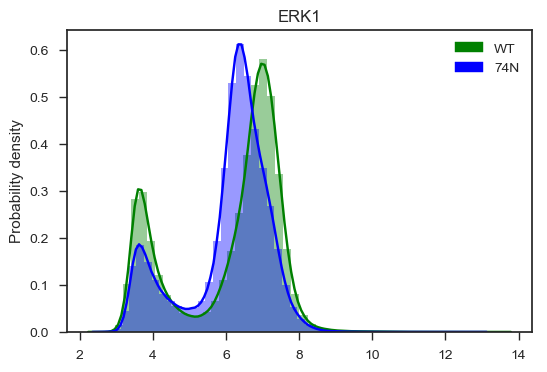

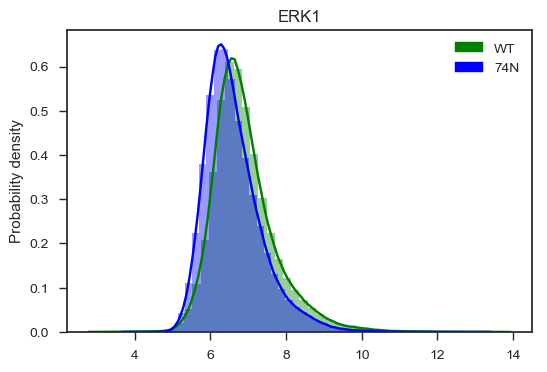

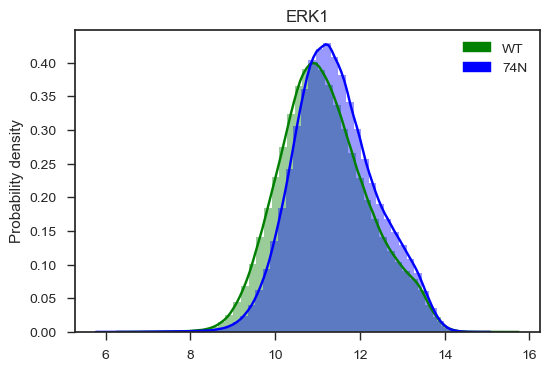

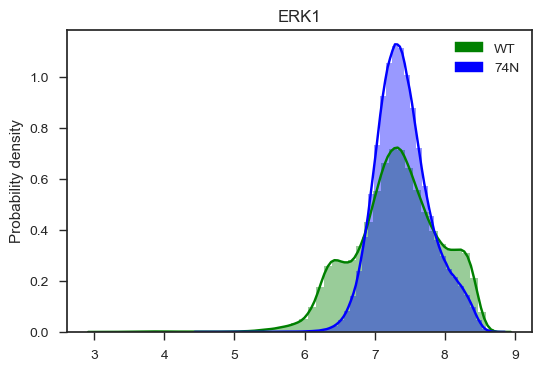

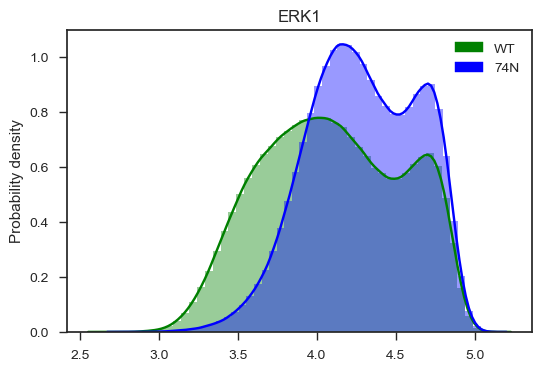

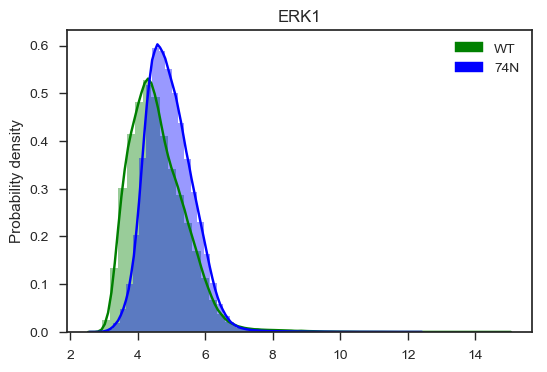

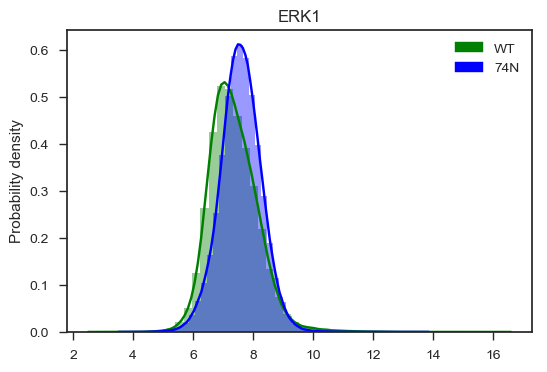

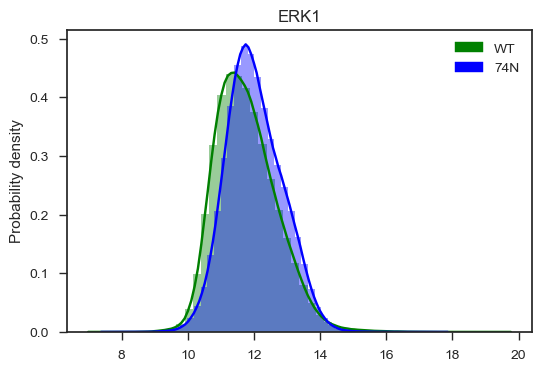

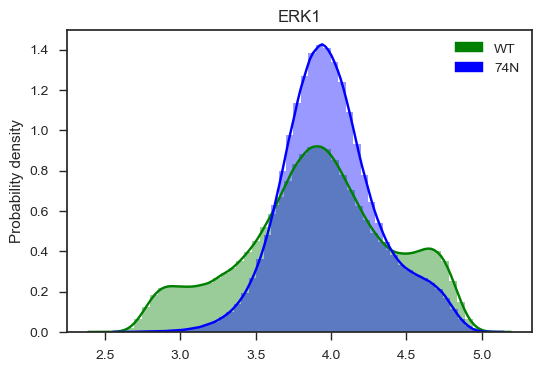

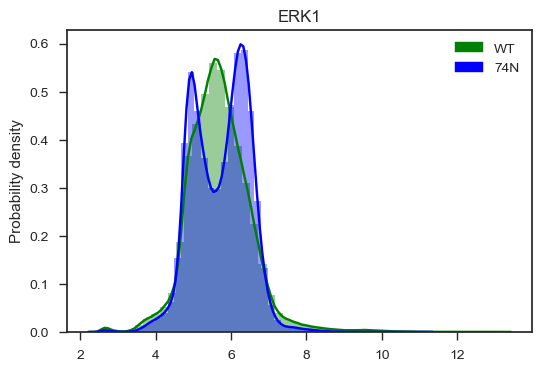

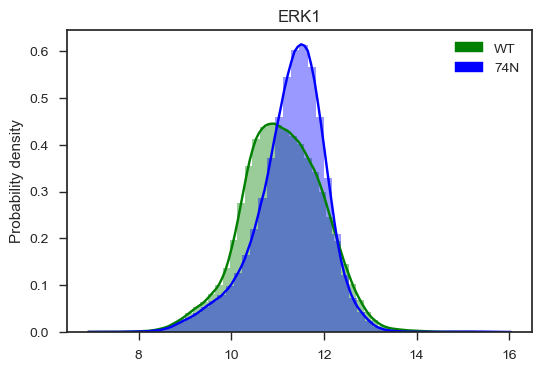

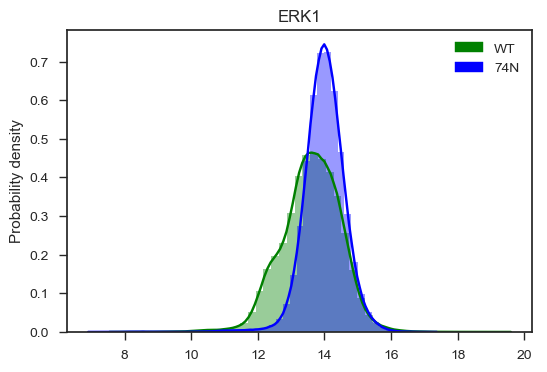

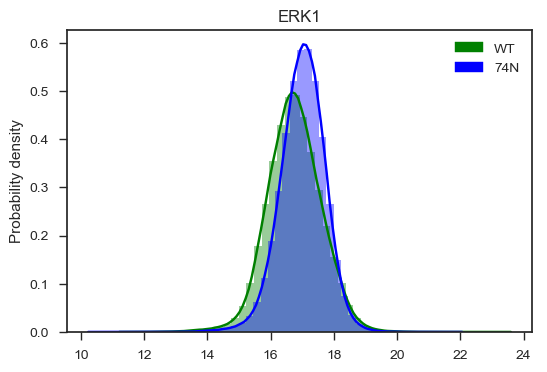

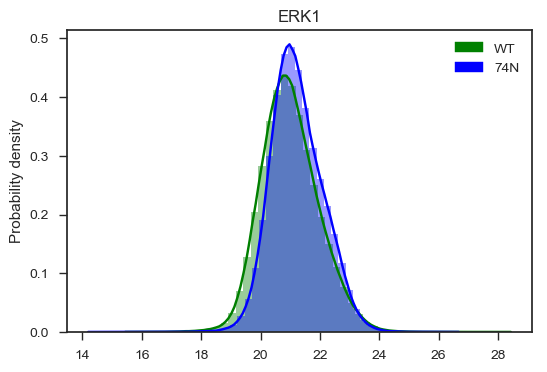

In [31]:
#dist = 7

for dist in np.concatenate(np.argwhere(stats >= 0.1)):
    plt.figure(dpi=100)
    sns.distplot(dist2[:,dist]*10, color='green')
    sns.distplot(dist3[:,dist]*10, color='blue')
    #plt.xlabel('E88-F185 distance ($\AA$)')
    plt.ylabel('Probability density')
    #plt.xlim((2,10))
    #plt.ylim((0,3))
    #plt.title('ERK2')

    patch1 = mpatches.Patch(color='green', label='WT')
    patch2 = mpatches.Patch(color='blue', label='74N')
    plt.legend(handles=[patch1, patch2])

    plt.show()

In [24]:
#################

In [ ]:
# let's just look at the most important distances - V186 - L168, T188 - D147, T188 - K149, Y185 - D147, T183-D147
# these are contact indices: 38,60,61,53,57

In [1]:
dist = 53 # Y185 - D147

print(scipy.stats.ks_2samp(dist2[:,dist], dist3[:,dist])[0])

plt.figure(dpi=300)
sns.distplot(dist2[:,dist]*10, color='green')
sns.distplot(dist3[:,dist]*10, color='blue')
sns.distplot(dist4[:,dist]*10, color='yellow')
sns.distplot(dist5[:,dist]*10, color='black')
#plt.xlabel('E88-F185 distance ($\AA$)')
plt.ylabel('Probability density')
plt.xlim((2,10))
#plt.ylim((0,3))
#plt.title('ERK2')

patch1 = mpatches.Patch(color='green', label='WT')
patch2 = mpatches.Patch(color='blue', label='55N')
patch3 = mpatches.Patch(color='yellow', label='Q102M')
patch4 = mpatches.Patch(color='black', label='55N-Q102M')
plt.legend(handles=[patch1, patch2, patch3, patch4])

plt.show()

NameError: name 'scipy' is not defined

In [41]:
# look at how the distance changes in trajectories

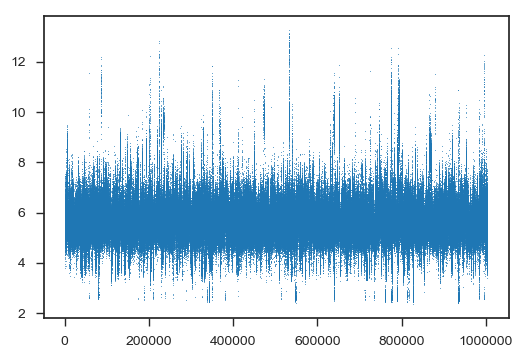

In [46]:
dist = 53

plt.figure(dpi=100)
plt.scatter(range(len(dist2[:,dist])), dist2[:,dist]*10, s=0.1)
plt.show()

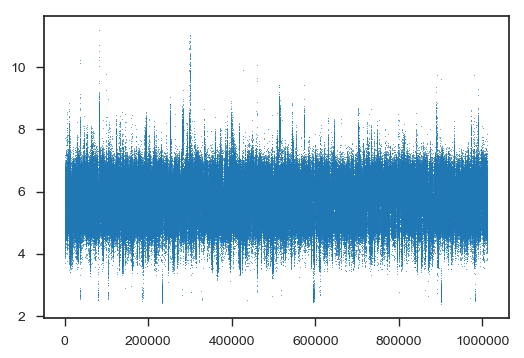

In [47]:
dist = 53

plt.figure(dpi=100)
plt.scatter(range(len(dist3[:,dist])), dist3[:,dist]*10, s=0.1)
plt.show()

In [ ]:
# count percentages in contact

In [84]:
dist = 53

len(np.argwhere(dist2[:,dist]<0.4)) / len(dist2[:,dist])

0.017195056956571548

In [85]:
dist = 53

len(np.argwhere(dist3[:,dist]<0.4)) / len(dist3[:,dist])

0.008840254972396433

In [171]:
dist = 53

len(np.argwhere(dist4[:,dist]<0.4)) / len(dist4[:,dist])

0.004200535874001253

In [173]:
dist = 53

len(np.argwhere(dist5[:,dist]<0.4)) / len(dist5[:,dist])

0.0023682534059711983

In [86]:
# interesting - let's see if this holds in an MSM

In [48]:
# there look to be rare transitions to a contact formed state? let's look at a trajectory

In [49]:
distances = np.load('distances2_cisphospho.npy')

In [50]:
distances = [x[0] for x in distances]

In [67]:
#trajs = []
mins = []

for i,traj in enumerate(distances):
    #if np.any(traj[:,53] < 0.4):
        #trajs.append(i)
    mins.append(np.min(traj[:,53]))    

In [70]:
np.argmin(mins)

820

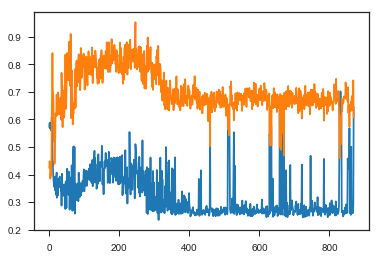

In [89]:
plt.plot(distances[820][:,53])
plt.plot(distances[820][:,38])

In [76]:
# the trajectory showed that the V186 - L168 distance (index 38) switches at the same time as the Y185 - D147, 
# look at trajs for that too

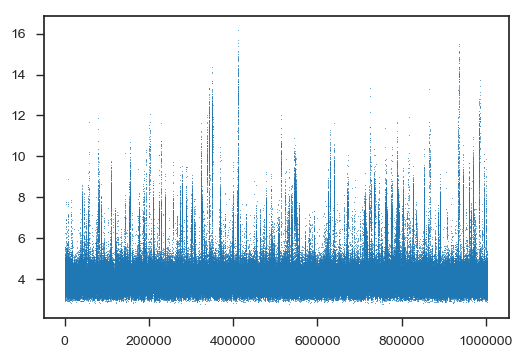

In [77]:
dist = 38

plt.figure(dpi=100)
plt.scatter(range(len(dist2[:,dist])), dist2[:,dist]*10, s=0.1)
plt.show()

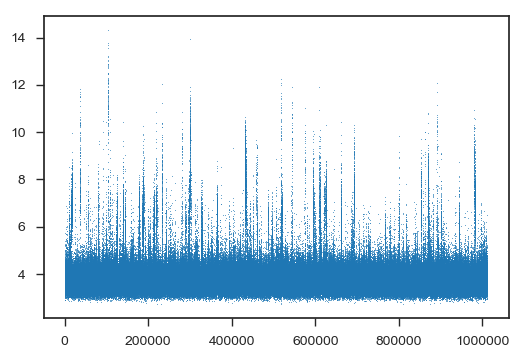

In [78]:
dist = 38

plt.figure(dpi=100)
plt.scatter(range(len(dist3[:,dist])), dist3[:,dist]*10, s=0.1)
plt.show()

In [87]:
maxs = []

for i,traj in enumerate(distances):
    maxs.append(np.max(traj[:,38]))    

In [88]:
np.argmax(maxs)

404

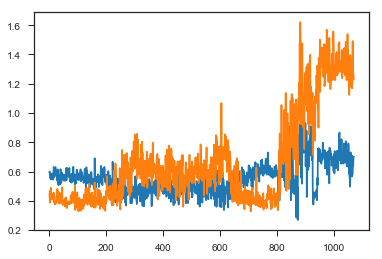

In [90]:
plt.plot(distances[404][:,53])
plt.plot(distances[404][:,38])

In [97]:
dist = 38

len(np.argwhere(dist2[:,dist]>0.5)) / len(dist2[:,dist])

0.050993440156997916

In [98]:
dist = 38

len(np.argwhere(dist3[:,dist]>0.5)) / len(dist3[:,dist])

0.024397641544851353

In [174]:
dist = 38

len(np.argwhere(dist4[:,dist]>0.5)) / len(dist4[:,dist])

0.040658453012823045

In [175]:
dist = 38

len(np.argwhere(dist5[:,dist]>0.5)) / len(dist5[:,dist])

0.011063276264806346

In [99]:
# ok so let's do an MSM in the space of these two distances

In [100]:
import pyemma

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.5, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [113]:
distances = np.load('distances2_cisphospho.npy')
distances = [x[0] for x in distances]

In [115]:
tica = pyemma.coordinates.tica([x[:,np.array([38,53])] for x in distances], lag=100, commute_map=True, kinetic_map=False, dim=2)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=998), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [116]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [122]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=100)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

29-03-19 19:51:55 pyemma.coordinates.clustering.kmeans.KmeansClustering[9] INFO     Cluster centers converged after 40 steps.


In [123]:
dtrajs = kmeans.get_output()

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [129]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [131]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

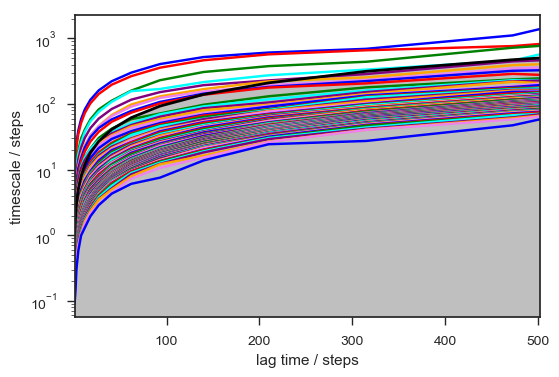

In [159]:
plt.figure(dpi=100)
pyemma.plots.plot_implied_timescales(its)

In [134]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=100)

In [137]:
msm.timescales()[0]

425.6490318870628

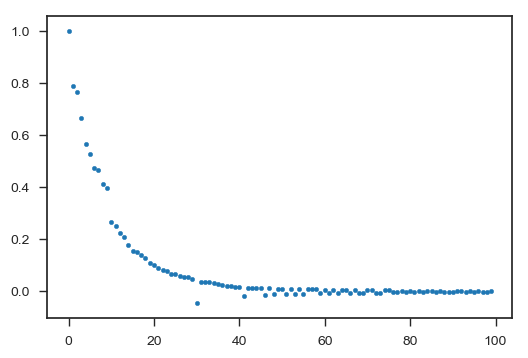

In [158]:
plt.figure(dpi=100)
plt.scatter(range(len(msm.eigenvalues())), msm.eigenvalues(), s=10)

In [145]:
# try 3 states

In [156]:
pcca = msm.pcca(3)

In [157]:
pcca.coarse_grained_stationary_probability

array([0.01684341, 0.03522826, 0.94792833])

In [161]:
# now combine wt and ins

In [176]:
distances2 = np.load('distances2_cisphospho.npy')
distances3 = np.load('distances3_cisphospho.npy')
distances = np.concatenate([[x[0] for x in distances2], [x[0] for x in distances3]])

In [177]:
tica = pyemma.coordinates.tica([x[:,np.array([38,53])] for x in distances], lag=100, commute_map=True, kinetic_map=False, dim=2)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1997), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [178]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1999), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [180]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=25)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=25), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

29-03-19 22:38:58 pyemma.coordinates.clustering.kmeans.KmeansClustering[24] INFO     Algorithm did not reach convergence criterion of 1e-05 in 25 iterations. Consider increasing max_iter.


In [181]:
dtrajs = kmeans.get_output()
dtrajs = [np.concatenate(x) for x in dtrajs]

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1999), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [182]:
its = pyemma.msm.its(dtrajs)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

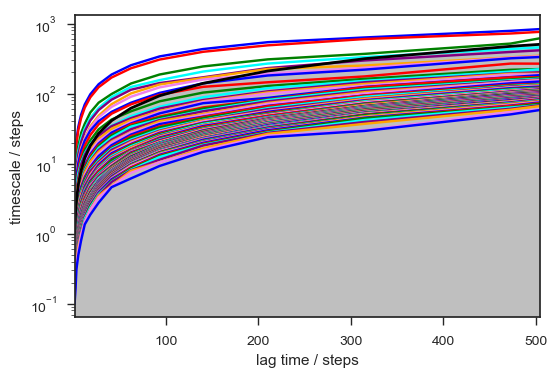

In [183]:
plt.figure(dpi=100)
pyemma.plots.plot_implied_timescales(its)

In [184]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=200)

In [185]:
msm.timescales()[0]

533.9013459524641

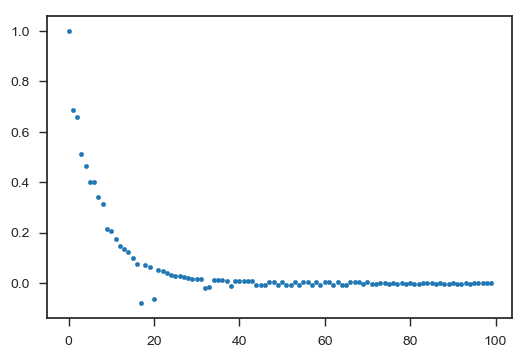

In [186]:
plt.figure(dpi=100)
plt.scatter(range(len(msm.eigenvalues())), msm.eigenvalues(), s=10)

In [187]:
pcca = msm.pcca(3)

In [188]:
pcca.coarse_grained_stationary_probability

array([0.02389904, 0.03245967, 0.94364129])

In [189]:
# ok so now build separate msms for wt and mut, and add up populations of macrostates

In [194]:
msm_wt = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)

In [195]:
msm_mut = pyemma.msm.estimate_markov_model(dtrajs[1000:], lag=200)

In [196]:
msm_wt.timescales()[0]

585.7876748730669

In [197]:
msm_mut.timescales()[0]

600.02879131774

In [198]:
msm_wt.nstates

100

In [199]:
msm_mut.nstates

100

In [200]:
msm.nstates

100

In [223]:
wt_pi = [0]*len(pcca.metastable_sets)

for i in range(len(msm_wt.active_set)):
    for j, membership in enumerate(pcca.memberships[i]):
        wt_pi[j] += msm_wt.pi[i]*membership

In [224]:
wt_pi

[0.03402447229976981, 0.04232960638830398, 0.9236459213119259]

In [227]:
mut_pi = [0]*len(pcca.metastable_sets)

for i in range(len(msm_mut.active_set)):
    for j, membership in enumerate(pcca.memberships[i]):
        mut_pi[j] += msm_mut.pi[i]*membership

In [228]:
mut_pi

[0.01494603552538364, 0.024044281583199215, 0.9610096828914172]

In [230]:
###### quick check of microstate empirical vs model populations - just remembered

In [232]:
from collections import Counter

In [233]:
emp_pi = np.array([Counter(np.concatenate(dtrajs))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

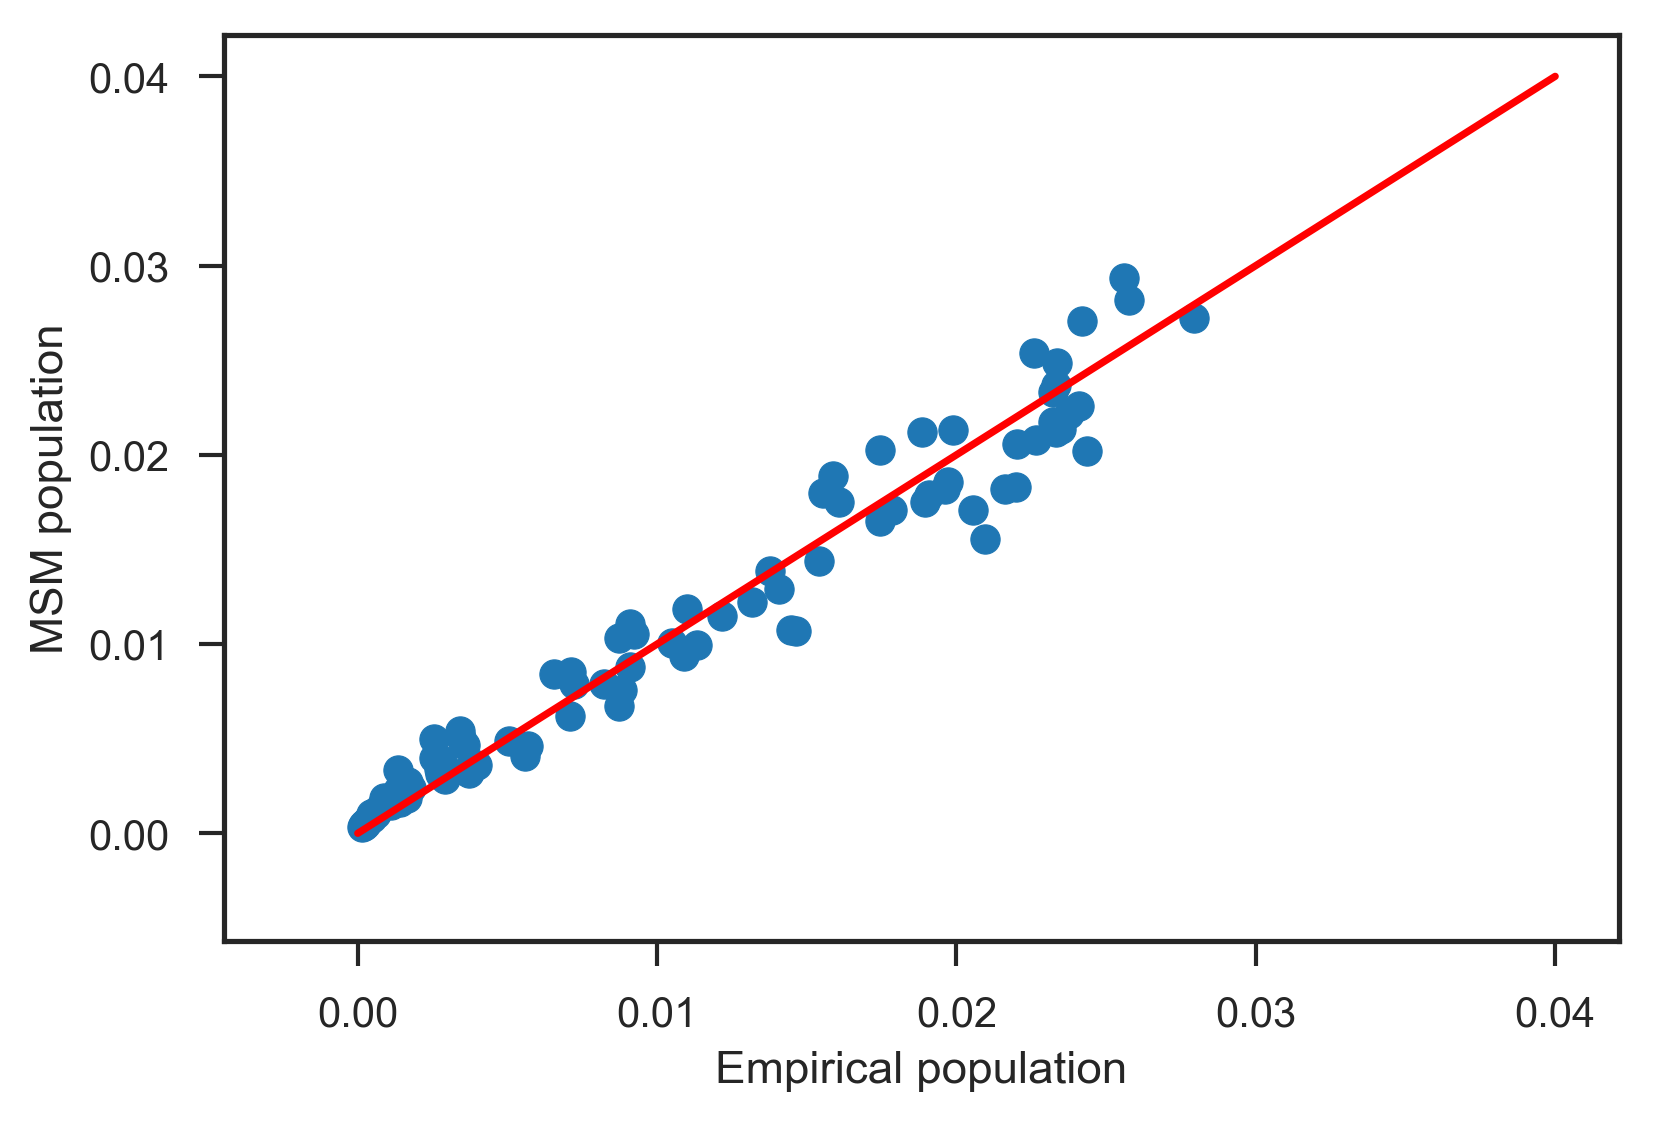

In [236]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.04], [0,0.04], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [229]:
# let's see the distances in those states - actually plot all states on a 2D distance x distance plot

In [243]:
indexes = kmeans.sample_indexes_by_cluster(range(100), 100)

In [250]:
distances[0].shape

(1250, 66)

In [254]:
distances_by_cluster = []

for state in indexes:
    distances_by_cluster.append([])
    for frame in state:
        distances_by_cluster[-1].append([distances[frame[0]][frame[1]][38], distances[frame[0]][frame[1]][53]])

In [260]:
distances_by_cluster = np.array(distances_by_cluster)

In [261]:
dist_means = []

for state in distances_by_cluster:
    dist_means.append([np.mean(state[:,0]), np.mean(state[:,1])])

In [263]:
dist_means = np.array(dist_means)

In [264]:
dist_means.shape

(100, 2)

(2, 14)

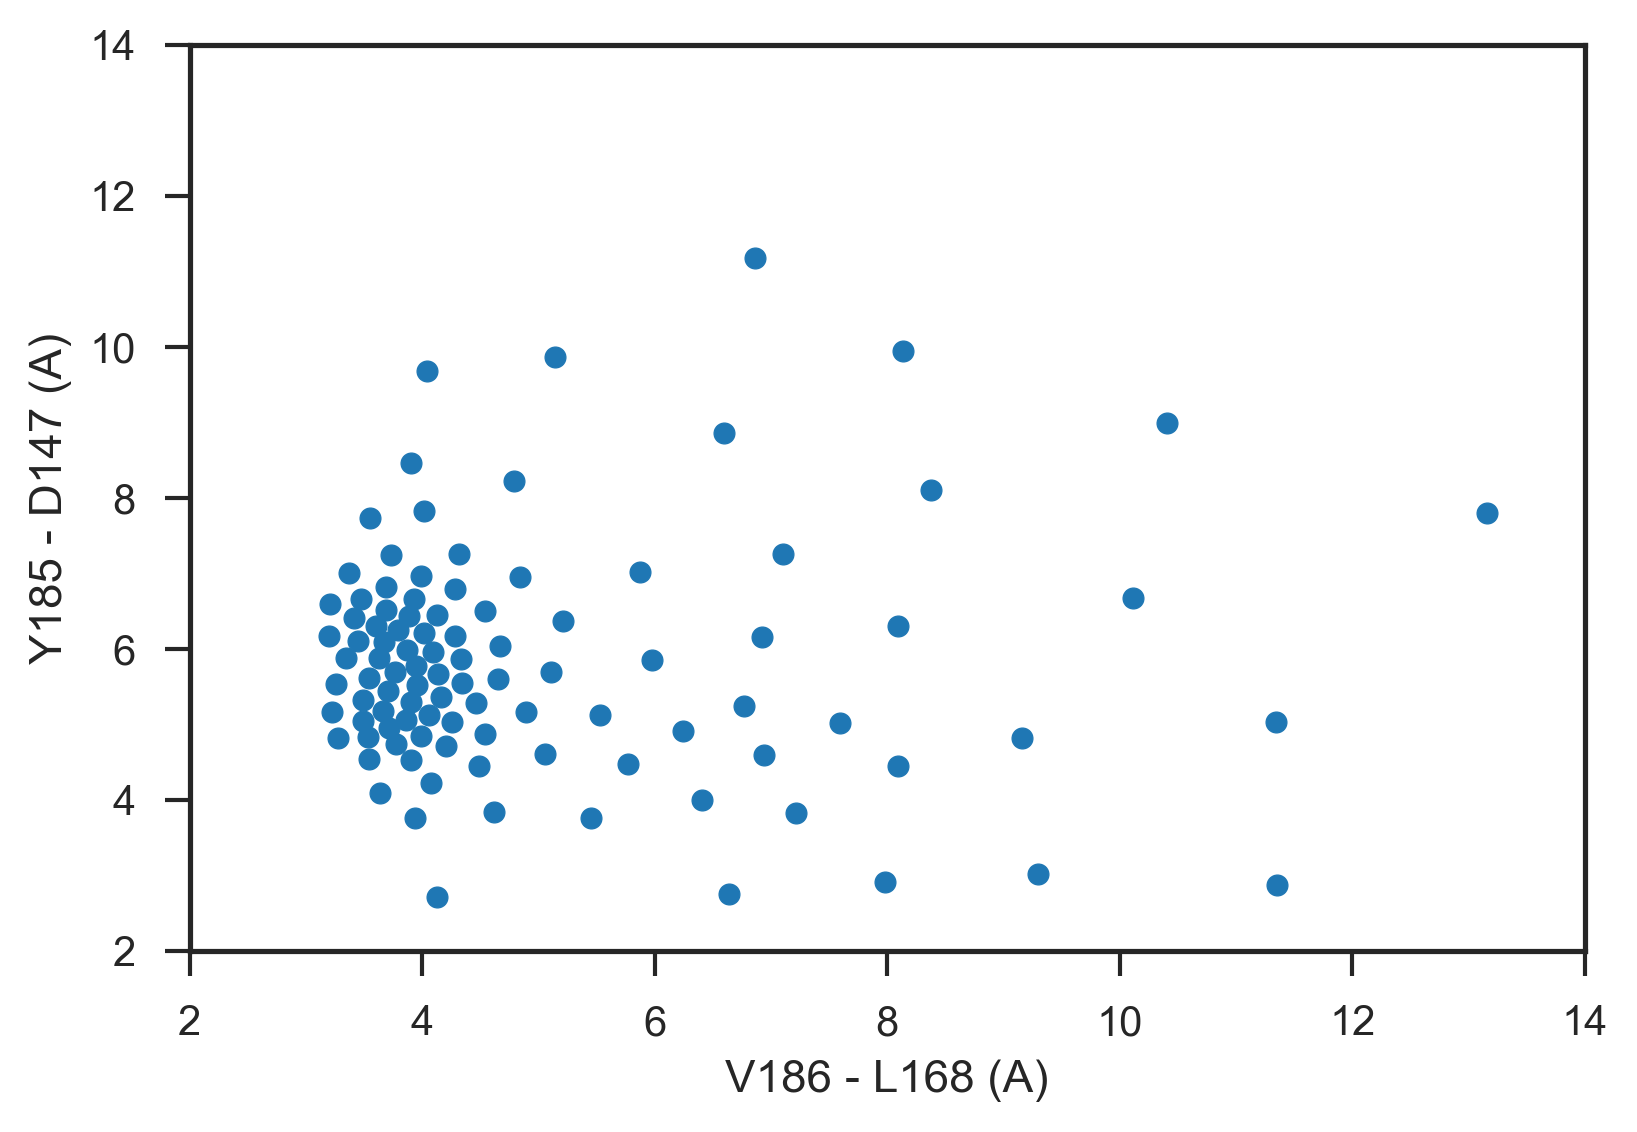

In [296]:
plt.figure(dpi=300)
plt.scatter(dist_means[:,0]*10, dist_means[:,1]*10, s=25)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

In [280]:
x = np.concatenate([dist2[:,38], dist3[:,38]])

In [281]:
y = np.concatenate([dist2[:,53], dist3[:,53]])

In [282]:
x.shape

(2016023,)

(2, 14)

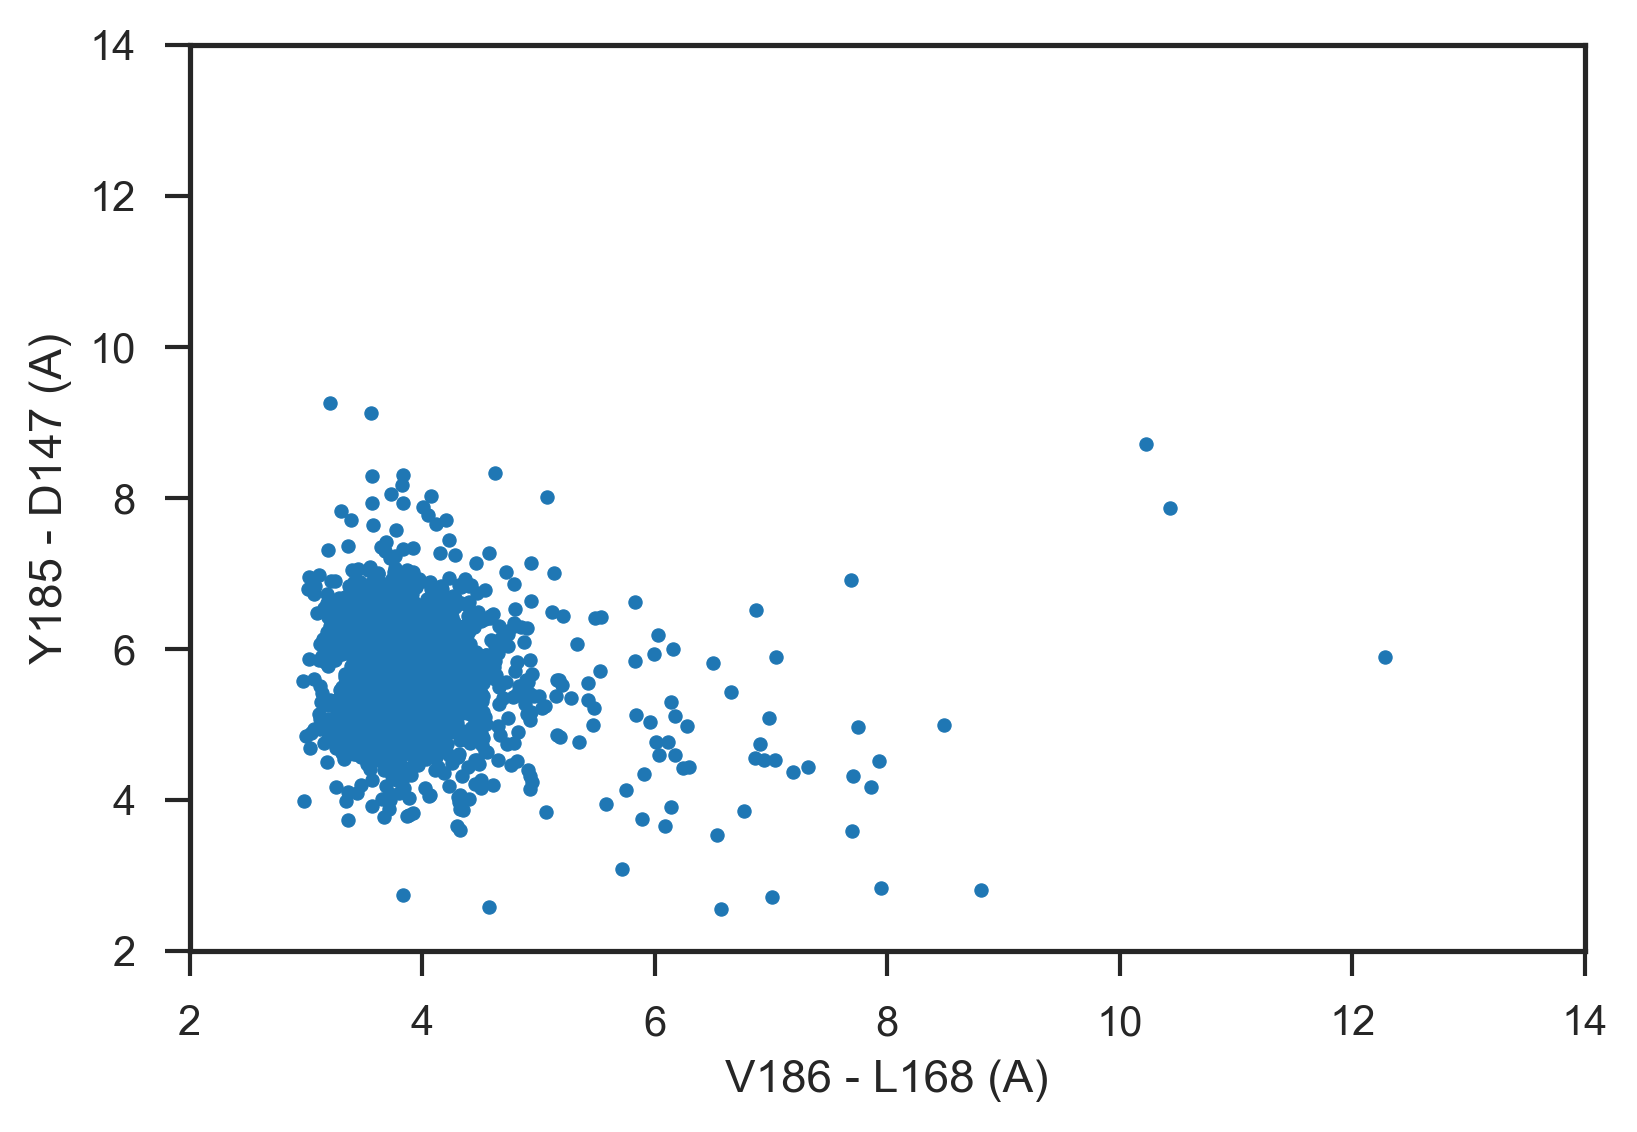

In [297]:
plt.figure(dpi=300)
plt.scatter(x[::1000]*10, y[::1000]*10, s=10)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

(2, 14)

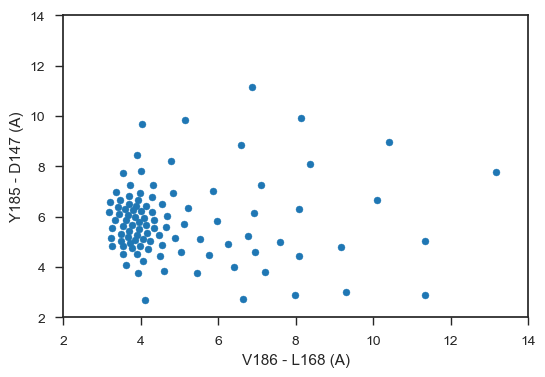

In [303]:
plt.figure(dpi=100)
plt.scatter(dist_means[:,0]*10, dist_means[:,1]*10, s=25)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

(2, 14)

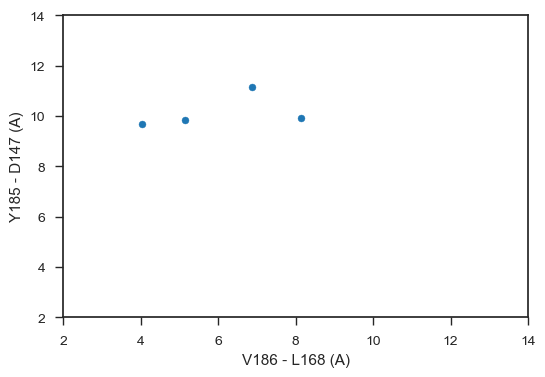

In [300]:
plt.figure(dpi=100)
plt.scatter(dist_means[pcca.metastable_sets[0],0]*10, dist_means[pcca.metastable_sets[0],1]*10, s=25)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

(2, 14)

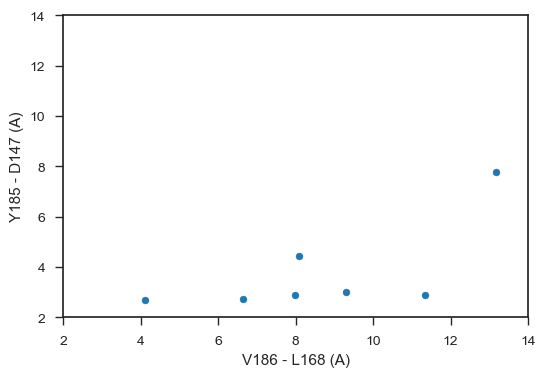

In [301]:
plt.figure(dpi=100)
plt.scatter(dist_means[pcca.metastable_sets[1],0]*10, dist_means[pcca.metastable_sets[1],1]*10, s=25)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

(2, 14)

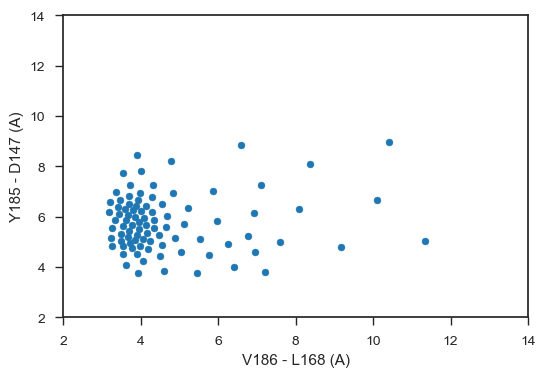

In [302]:
plt.figure(dpi=100)
plt.scatter(dist_means[pcca.metastable_sets[2],0]*10, dist_means[pcca.metastable_sets[2],1]*10, s=25)
plt.xlabel('V186 - L168 (A)')
plt.ylabel('Y185 - D147 (A)')
plt.xlim(2,14)
plt.ylim(2,14)

In [ ]:
# so STATE 1 is cis-phosphorylation ready presumably, but LESS POPULATED IN INSERTION (note what I call msm_mut
# wrongly above, should be msm_ins)

In [315]:
####### NO MSM, LOOK ONLY AT CONTACTS

In [316]:
# instead of looking at distributions of distances, let's look at % of contact established

In [317]:
# let's just look at the most important distances - V186 - L168, T188 - D147, T188 - K149, Y185 - D147, T183-D147
# these are contact indices: 38,60,61,53,57

0.18669132778823083


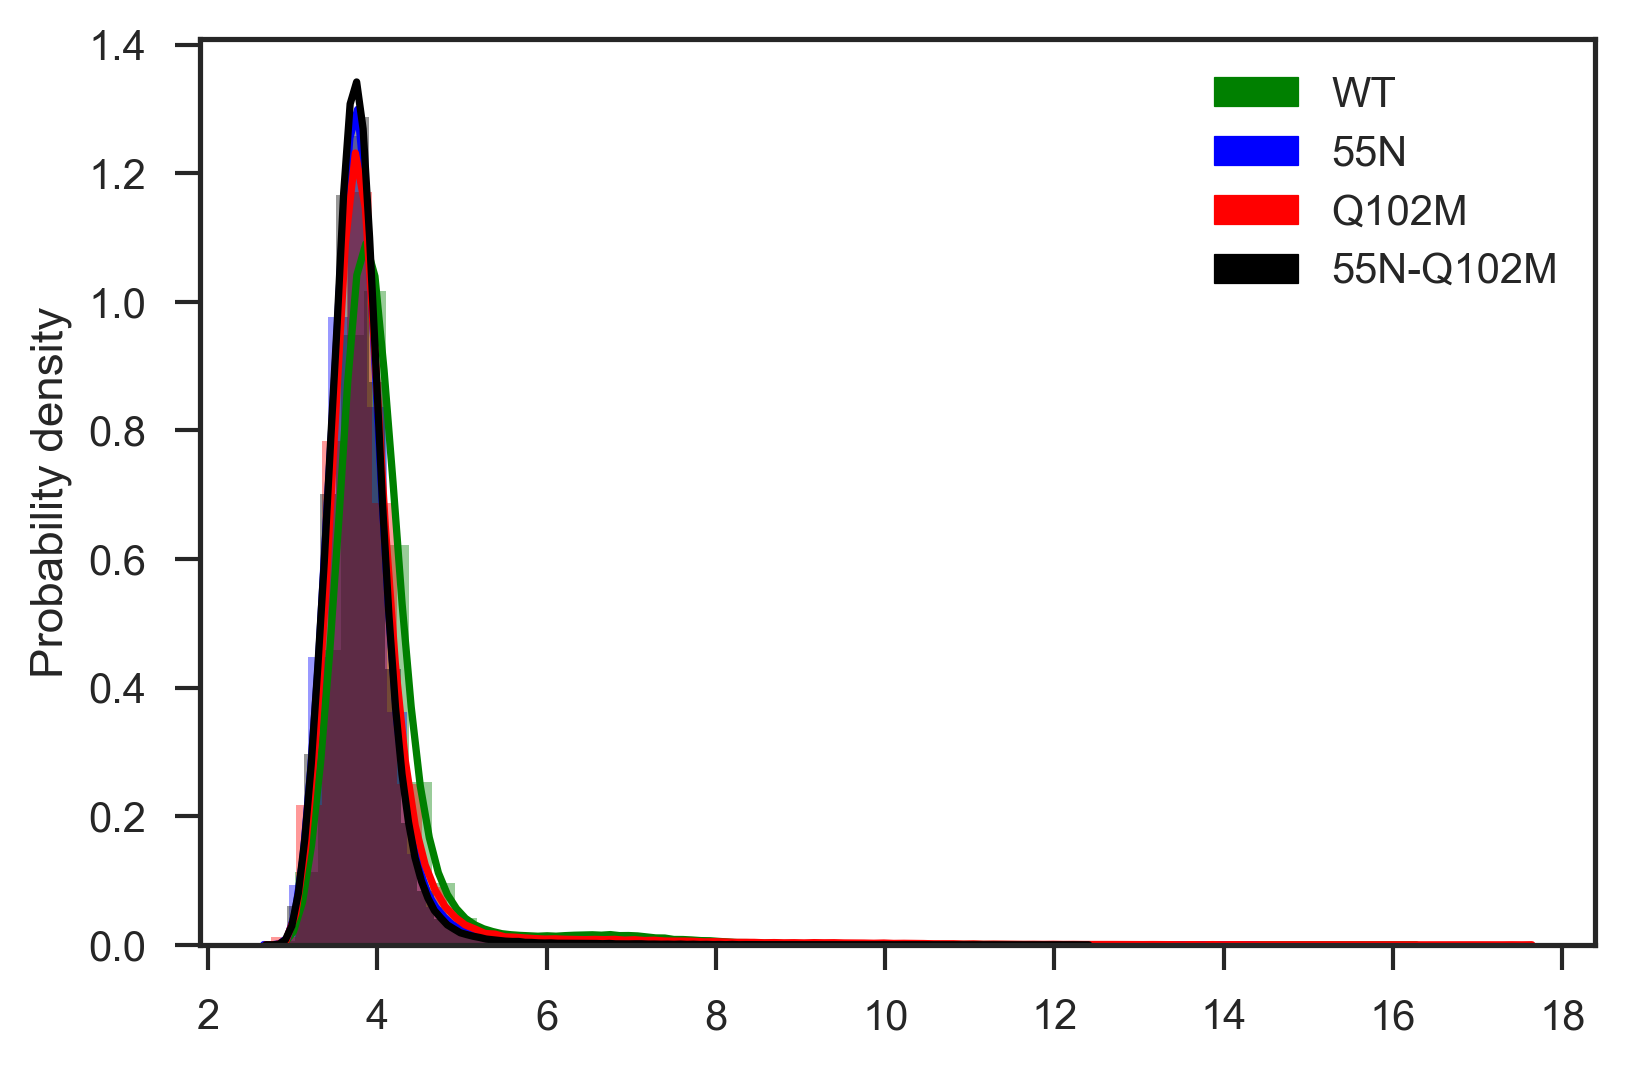

In [373]:
dist = 38

print(scipy.stats.ks_2samp(dist2[:,dist], dist3[:,dist])[0])

plt.figure(dpi=300)
sns.distplot(dist2[:,dist]*10, color='green')
sns.distplot(dist3[:,dist]*10, color='blue')
sns.distplot(dist4[:,dist]*10, color='red')
sns.distplot(dist5[:,dist]*10, color='black')
#plt.xlabel('E88-F185 distance ($\AA$)')
plt.ylabel('Probability density')
#plt.xlim((2,10))
#plt.ylim((0,3))
#plt.title('ERK2')

patch1 = mpatches.Patch(color='green', label='WT')
patch2 = mpatches.Patch(color='blue', label='55N')
patch3 = mpatches.Patch(color='red', label='Q102M')
patch4 = mpatches.Patch(color='black', label='55N-Q102M')
plt.legend(handles=[patch1, patch2, patch3, patch4])

plt.show()

In [374]:
np.sum((dist2[:,dist]<0.4).astype('float'))/len(dist2)

0.5823726010748779

In [375]:
np.sum((dist3[:,dist]<0.4).astype('float'))/len(dist2)

0.7656467447339453

In [376]:
np.sum((dist4[:,dist]<0.4).astype('float'))/len(dist2)

0.7318892048992115

In [377]:
np.sum((dist5[:,dist]<0.4).astype('float'))/len(dist2)

0.8137622218790936